<a href="https://colab.research.google.com/github/anshit7777/Potato-Blight-Classification-using-CNN/blob/main/Plant_Leaf_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Mount the google drive on google collab Notebook and import the data set.

In [ ]:
#load the drive
from google.colab import drive
#this will prompt for authorization
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After mounting our drive I will loacate the folder where our data is stored to use it in our collab notebook.

In [ ]:
#this will show files present in the "/content/drive/My Drive/My Drive/Projects/Plant-Leaf-Disease-Prediction"
!ls "/content/drive/My Drive/Doc1/Projects/Plant-Leaf-Disease-Prediction"   #used ls command to see whether files are visible or not.

Dataset  Model	Plant_Leaf_Disease_Prediction-Flask-App  Plant_Leaf_Disease_Prediction.ipynb


In [ ]:
!ls "/content/drive/My Drive/Doc1/Projects/Plant-Leaf-Disease-Prediction/Dataset"  # Which files are there in Dataset

Potato___Early_blight  Potato___healthy  Potato___Late_blight


Step 2: Import the required libraries.

Next we will import all the required libraries.As we are making a CNN model we will import all the required layers,activations,optimizers etc.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2    # for image processing
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array , array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D
from keras.layers import Activation , Flatten , Dropout , Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [ ]:
!pip install tensorflow==2.12.0

In [ ]:
print(tf. __version__)

2.12.0


Step 3: Visualizing the images and Resize images.

Now we observe some of the images that are their in our dataset.We will plot 12 images here using the matplotlib library.

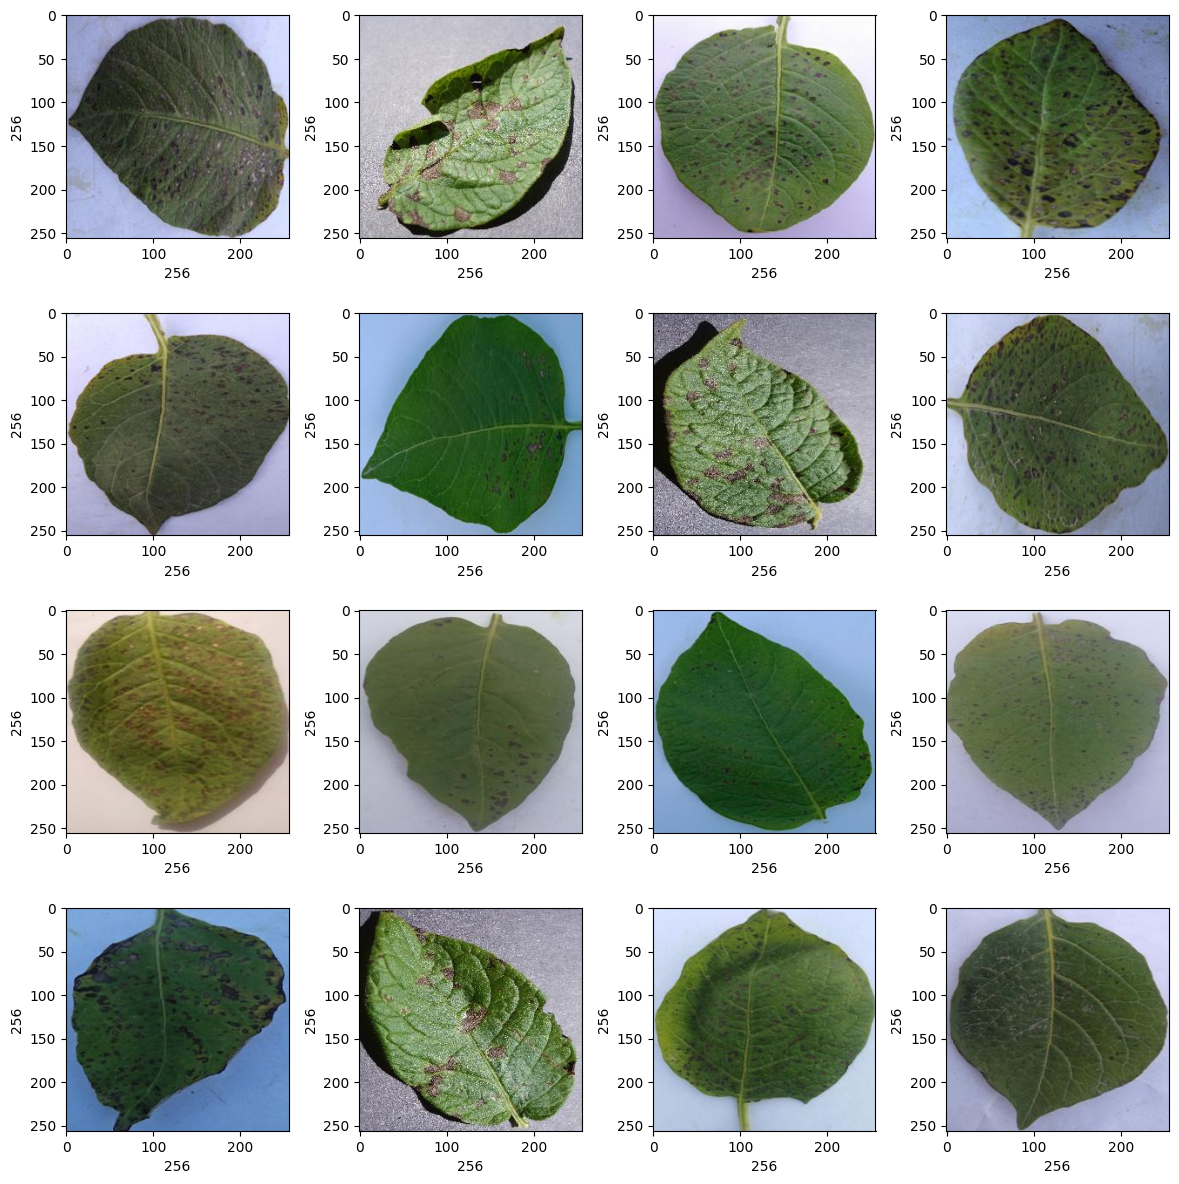

In [ ]:
#Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Doc1/Projects/Plant-Leaf-Disease-Prediction/Dataset/Potato___Early_blight"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10) # width of the image
  plt.ylabel(rand_img.shape[1], fontsize = 10) # height of the image




Step 4: Converting image into a NumPy array and normalize them.

After visualizing the images let us move forward and create a function which will convert the images into numpy array.It is required because we will normalize our dataset after this 0-255. Normalize means information is made consistent and errors are removed and brought together in a similar format so that it's easier to interpret and use. Eliminating anomalies and reducing redundancy.

In [ ]:
#converting images to array
def convert_image_to_array(image_dir):   # take one image at a time
  try:
    image = cv2.imread(image_dir) # that particular image is read with the help of CV2
    if image is not None :
      image = cv2.resize(image,(256,256))
      return img_to_array(image)   # image will be converted into numpy array.
    else :
      return np.array([])
  except Exception as e:
    print(f"Error : {e}")
    return None




In [ ]:
dir = "/content/drive/My Drive/Doc1/Projects/Plant-Leaf-Disease-Prediction/Dataset"
image_list , label_list = [] , []
all_labels = ['Potato-Early_blight' ,'Potato-healthy' ,'Potato-Late_blight']
binary_labels = [0,1,2]
temp = -1

# reading and converting image to numpy array.
for directory in ['Potato___Early_blight' ,'Potato___healthy' ,'Potato___Late_blight']:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

Step 5: Visualize the class count.

We will also observe the number of images under different classes .
Next will observe the shape of the image.

In [ ]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

1    1047
0    1003
2    1000
dtype: int64

In [ ]:
image_list[0].shape  # horizontal pixels,vertical pixels,RGB component

(256, 256, 3)

Step 6: Splitting the dataset into train,validate and test sets.

Next we will use sklearn train_test_split to split the dataset into testing and training data.Here I have taken test size as 0.2 so my data will be divided into 80% and 20% testing data.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

Now we will normalize the dataset of our images.As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.

In [ ]:
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
x_train = x_train.reshape(-1, 256,256,3)

x_test=x_test.reshape(-1, 256,256,3)

Step 7: Performing one-hot encoding on target variable.If it is not performed then 2 label will outperform 0,1 label or 2 label will dominate 0 and 1 label.

In [ ]:
y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

Step 8: Creating the model architecture,compile the model and then fit it using the training data.

Next we will create a network architecture for the model.We have used different types of layers according to their features namely Conv_2d(It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor),max_pooling2d(It is a downsampling technique which takes out the maximum value over the window defined by poolsize),flatten (It flattens the input and creates a 1D output),Dense(Dense layer produce the output as the dot product of input and kernel).

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256,256,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam (0.0001), metrics=['accuracy'])

Next we will split the training dataset into validation and training data.

In [ ]:

#Next we will split the training dataset into validation and training data.

x_train, x_val, y_train, y_val= train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)


In [ ]:
# Training the model
epochs = 60

batch_size = 128

history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/60
16/16 [==============================] - 158s 10s/step - loss: 1.0239 - accuracy: 0.5323 - val_loss: 0.9220 - val_accuracy: 0.5697
Epoch 2/60
16/16 [==============================] - 154s 10s/step - loss: 0.8659 - accuracy: 0.6455 - val_loss: 0.8200 - val_accuracy: 0.7049
Epoch 3/60
16/16 [==============================] - 156s 10s/step - loss: 0.7905 - accuracy: 0.7034 - val_loss: 0.7703 - val_accuracy: 0.7316
Epoch 4/60
16/16 [==============================] - 154s 10s/step - loss: 0.7533 - accuracy: 0.7106 - val_loss: 0.7556 - val_accuracy: 0.7295
Epoch 5/60
16/16 [==============================] - 162s 10s/step - loss: 0.7190 - accuracy: 0.7162 - val_loss: 0.7060 - val_accuracy: 0.7193
Epoch 6/60
16/16 [==============================] - 155s 10s/step - loss: 0.6856 - accuracy: 0.7070 - val_loss: 0.6830 - val_accuracy: 0.7152
Epoch 7/60
16/16 [==============================] - 155s 10s/step - loss: 0.6578 - accuracy: 0.7131 - val_loss: 0.6684 - val_accuracy: 0.7111
Epoch 

Saving the model using different techniques.

In [ ]:
model.save("/content/drive/My Drive/My Drive/Projects/Plant-Leaf-Disease-Prediction/Model/plant_disease_model.h5")

Step 9: Plot the accuracy and loss against each epoch

Next we will plot accuracy of the model for the training history.

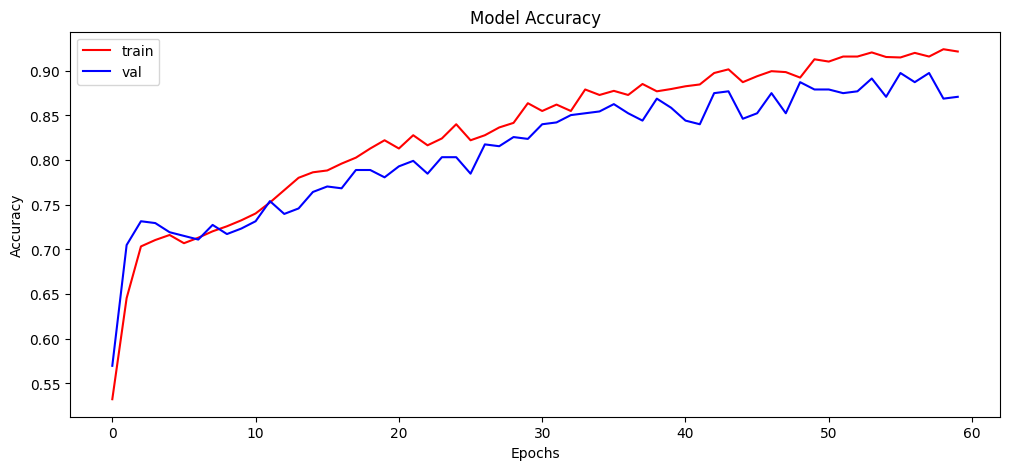

In [ ]:
plt.figure(figsize=(12, 5))  # plot the training history

plt.plot(history.history['accuracy'], color='r')  # training accuracy

plt.plot(history.history['val_accuracy'], color='b') # validation accuracy

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend(['train', 'val'])

plt.show()

Evaluating the model to know the accuracy of the model.

In [ ]:
print("Calculating model accuracy")
scores = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
20/20 [==============================] - 14s 657ms/step - loss: 0.3459 - accuracy: 0.8656
Test Accuracy: 86.55737638473511


Step 10: Make predictions on testing data.

Next we will use our model to predict predicting the testing dataset label.

In [ ]:
y_pred = model.predict(x_test)

20/20 [==============================] - 13s 653ms/step


Step 11: Visualizing the original and predicted labels for the test images

Printing out the original and the predicted label.

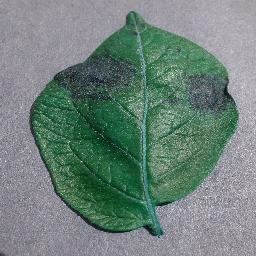

In [ ]:
img = array_to_img(x_test[11])
img

Finding max value

In [ ]:
print("Original_Label: ",all_labels[np.argmax(y_test[11])])

print("Predicted_Label: ",all_labels [np.argmax(y_pred[4])])
print(y_pred[2])

Original_Label:  Potato-Late_blight
Predicted_Label:  Potato-Early_blight
[0.89566106 0.10265671 0.00168218]


In [ ]:
for i in range(50):
  print (all_labels[np.argmax(y_test[i])], "-", all_labels[np.argmax(y_pred[i])])




Potato-Late_blight - Potato-Late_blight
Potato-healthy - Potato-healthy
Potato-Early_blight - Potato-Early_blight
Potato-healthy - Potato-healthy
Potato-Early_blight - Potato-Early_blight
Potato-healthy - Potato-healthy
Potato-healthy - Potato-healthy
Potato-Late_blight - Potato-Late_blight
Potato-healthy - Potato-Early_blight
Potato-healthy - Potato-healthy
Potato-Late_blight - Potato-Late_blight
Potato-Late_blight - Potato-Late_blight
Potato-healthy - Potato-healthy
Potato-Early_blight - Potato-Early_blight
Potato-Early_blight - Potato-Early_blight
Potato-healthy - Potato-Late_blight
Potato-healthy - Potato-healthy
Potato-Late_blight - Potato-Late_blight
Potato-Early_blight - Potato-Early_blight
Potato-Late_blight - Potato-Late_blight
Potato-Late_blight - Potato-Late_blight
Potato-healthy - Potato-healthy
Potato-Late_blight - Potato-Late_blight
Potato-Late_blight - Potato-Late_blight
Potato-healthy - Potato-Early_blight
Potato-healthy - Potato-healthy
Potato-Early_blight - Potato-Ear

Step 12: Deploy the project using streamlit application